### Imports

In [1]:
import os
import pymysql
import datetime
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### MySQL Settings

In [2]:
conn = pymysql.connect(host='localhost', port=3306, user='root', password='root', db='homedb')

### Code

##### RQ 2: How many of the extracted SQL queries are syntactically valid?

In [3]:
get_valid_queries = 'SELECT * FROM evo_sql_queries WHERE is_valid = 1'
get_invalid_queries = 'SELECT * FROM evo_sql_queries WHERE is_valid = 0'

valid_queries = pd.read_sql(get_valid_queries, conn)
invalid_queries = pd.read_sql(get_invalid_queries, conn)
print(f'valid queries: {len(valid_queries)}')
print(f'invalid queries: {len(invalid_queries)}')

valid queries: 19153
invalid queries: 6


##### RQ 3: How many of the extracted SQL queries have semantic bugs?

In [4]:
get_bugs = 'SELECT * FROM evo_sql_bugs'

bugs = pd.read_sql(get_bugs, conn)
print(f'queries with semantic bugs: {len(bugs)}')

queries with semantic bugs: 8441


##### RQ 4: How many semantic bugs do the extracted queries have on average?

In [5]:
get_bugs = 'SELECT * FROM evo_sql_bugs'

bugs_dict = dict()
bugs = pd.read_sql(get_bugs, conn)

def count_bugs(row):
    errors = row.errors.split(',')
    num = len(errors)
    bugs_dict[num] = bugs_dict.get(num, 0) + 1
    return num

bugs['errors'] = bugs.apply(count_bugs, axis=1)
tmp = bugs['errors'].count() / len(valid_queries)
print(f'semantic bugs on average: {tmp}')

semantic bugs on average: 0.44071424842061296


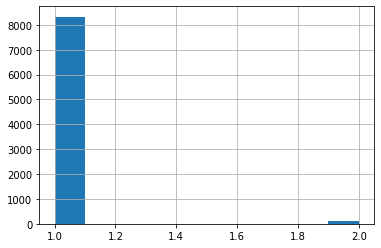

In [6]:
bugs['errors'].hist(bins=10)

In [7]:
print(bugs_dict)

{1: 8326, 2: 115}


##### RQ 5: What is the distribution of the semantic bugs?

In [8]:
get_bugs = 'SELECT * FROM evo_sql_bugs'
error_codes = dict()

bugs = pd.read_sql(get_bugs, conn)

def count_error_codes(row):
    errors = row.errors.replace('[', '').replace(']', '')
    errors = errors.split(',')
    for error in errors:
        error = error.replace(',', '').strip()
        if error_codes.get(error) is not None:
            error_codes[error] += 1
        else:
            error_codes[error] = 1

bugs['errors'] = bugs.apply(count_error_codes, axis=1)
error_codes_sorted = dict()
for key in sorted(error_codes):
    error_codes_sorted[key] = error_codes[key]
error_codes = error_codes_sorted

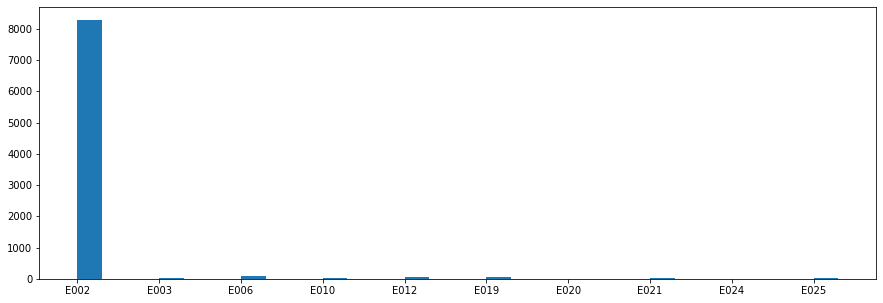

In [12]:
plt.figure(figsize=(15, 5))
plt.bar(range(len(error_codes)), list(error_codes.values()), align='edge', width=0.3)
plt.xticks(range(len(error_codes)), list(error_codes.keys()))
plt.savefig('prevalence_evosql.pdf', dpi=300, format='pdf', bbox_inches='tight')
plt.show()

In [10]:
E = len(pd.read_sql('SELECT * FROM evo_sql_queries WHERE is_valid = 1', conn))
E001 = len(pd.read_sql('SELECT * FROM evo_sql_bugs WHERE errors LIKE "%E001%"', conn))
E002 = len(pd.read_sql('SELECT * FROM evo_sql_bugs WHERE errors LIKE "%E002%"', conn))
E003 = len(pd.read_sql('SELECT * FROM evo_sql_bugs WHERE errors LIKE "%E003%"', conn))
E004 = len(pd.read_sql('SELECT * FROM evo_sql_bugs WHERE errors LIKE "%E004%"', conn))
E005 = len(pd.read_sql('SELECT * FROM evo_sql_bugs WHERE errors LIKE "%E005%"', conn))
E006 = len(pd.read_sql('SELECT * FROM evo_sql_bugs WHERE errors LIKE "%E006%"', conn))
E007 = len(pd.read_sql('SELECT * FROM evo_sql_bugs WHERE errors LIKE "%E007%"', conn))
E008 = len(pd.read_sql('SELECT * FROM evo_sql_bugs WHERE errors LIKE "%E008%"', conn))
E009 = len(pd.read_sql('SELECT * FROM evo_sql_bugs WHERE errors LIKE "%E009%"', conn))
E010 = len(pd.read_sql('SELECT * FROM evo_sql_bugs WHERE errors LIKE "%E010%"', conn))
E011 = len(pd.read_sql('SELECT * FROM evo_sql_bugs WHERE errors LIKE "%E011%"', conn))
E012 = len(pd.read_sql('SELECT * FROM evo_sql_bugs WHERE errors LIKE "%E012%"', conn))
E013 = len(pd.read_sql('SELECT * FROM evo_sql_bugs WHERE errors LIKE "%E013%"', conn))
E014 = len(pd.read_sql('SELECT * FROM evo_sql_bugs WHERE errors LIKE "%E014%"', conn))
E015 = len(pd.read_sql('SELECT * FROM evo_sql_bugs WHERE errors LIKE "%E015%"', conn))
E016 = len(pd.read_sql('SELECT * FROM evo_sql_bugs WHERE errors LIKE "%E016%"', conn))
E017 = len(pd.read_sql('SELECT * FROM evo_sql_bugs WHERE errors LIKE "%E017%"', conn))
E018 = len(pd.read_sql('SELECT * FROM evo_sql_bugs WHERE errors LIKE "%E018%"', conn))
E019 = len(pd.read_sql('SELECT * FROM evo_sql_bugs WHERE errors LIKE "%E019%"', conn))
E020 = len(pd.read_sql('SELECT * FROM evo_sql_bugs WHERE errors LIKE "%E020%"', conn))
E021 = len(pd.read_sql('SELECT * FROM evo_sql_bugs WHERE errors LIKE "%E021%"', conn))
E022 = len(pd.read_sql('SELECT * FROM evo_sql_bugs WHERE errors LIKE "%E022%"', conn))
E023 = len(pd.read_sql('SELECT * FROM evo_sql_bugs WHERE errors LIKE "%E023%"', conn))
E024 = len(pd.read_sql('SELECT * FROM evo_sql_bugs WHERE errors LIKE "%E024%"', conn))
E025 = len(pd.read_sql('SELECT * FROM evo_sql_bugs WHERE errors LIKE "%E025%"', conn))

In [11]:
bugs = dict()
bugs['E001'] = E001 / E * 100
bugs['E002'] = E002 / E * 100
bugs['E003'] = E003 / E * 100
bugs['E004'] = E004 / E * 100
bugs['E005'] = E005 / E * 100
bugs['E006'] = E006 / E * 100
bugs['E007'] = E007 / E * 100
bugs['E008'] = E008 / E * 100
bugs['E009'] = E009 / E * 100
bugs['E010'] = E010 / E * 100
bugs['E011'] = E011 / E * 100
bugs['E012'] = E012 / E * 100
bugs['E013'] = E013 / E * 100
bugs['E014'] = E014 / E * 100
bugs['E015'] = E015 / E * 100
bugs['E016'] = E016 / E * 100
bugs['E017'] = E017 / E * 100
bugs['E018'] = E018 / E * 100
bugs['E019'] = E019 / E * 100
bugs['E020'] = E020 / E * 100
bugs['E021'] = E021 / E * 100
bugs['E022'] = E022 / E * 100
bugs['E023'] = E023 / E * 100
bugs['E024'] = E024 / E * 100
bugs['E025'] = E025 / E * 100
bugs = dict(sorted(bugs.items(), key=lambda item: item[1]))
bugs

{'E001': 0.0,
 'E004': 0.0,
 'E005': 0.0,
 'E007': 0.0,
 'E008': 0.0,
 'E009': 0.0,
 'E011': 0.0,
 'E013': 0.0,
 'E014': 0.0,
 'E015': 0.0,
 'E016': 0.0,
 'E017': 0.0,
 'E018': 0.0,
 'E022': 0.0,
 'E023': 0.0,
 'E020': 0.0052211141857672425,
 'E024': 0.04699002767190519,
 'E003': 0.057432256043439676,
 'E021': 0.057432256043439676,
 'E025': 0.0730955986007414,
 'E010': 0.18796011068762075,
 'E012': 0.2819401660314311,
 'E019': 0.3341513078891035,
 'E006': 0.39158356393254323,
 'E002': 43.23604657233854}

### Generate co-occurrence matrix for evosql dataset

In [19]:
import copy
import math
import pymysql
import numpy as np
import pandas as pd

In [15]:
error_labels = 'E001 E002 E003 E004 E005 E006 E007 E008 E009 E010 E011 E012 E013 E014 E015 E016 E017 E018 E019 E020 E021 E022 E023 E024 E025'.split(' ')

In [16]:
get_bugs = 'SELECT * FROM evo_sql_bugs'
error_codes = np.empty((0, 25), int)

bugs = pd.read_sql(get_bugs, conn)

def get_error_code(error):
    if 'E00' in error:
        return int(error.split('E00')[1])
    return int(error.split('E0')[1])

def count_error_codes(row):
    global error_codes
    error_codes = np.append(error_codes, np.array([np.zeros(25, dtype=int)]), axis=0)
    row_index = len(error_codes) - 1
    errors = row.errors.replace('[', '').replace(']', '')
    errors = errors.split(',')
    for error in errors:
        error = error.replace(',', '').strip()
        col_index = get_error_code(error) - 1
        error_codes[row_index, col_index] = 1

bugs['errors'] = bugs.apply(count_error_codes, axis=1)

In [20]:
# compute co-occurrence matrix
cooccurrence_matrix = np.dot(error_codes.transpose(), error_codes)
# fill diagonal with zeros
np.fill_diagonal(cooccurrence_matrix, 0)
print('\ncooccurrence_matrix:\n{0}'.format(cooccurrence_matrix))

# compute co-occurrence matrix in percentage
cooccurrence_matrix_percentage = np.empty((0, 25), float)

row_index = 0
for row in cooccurrence_matrix:
    col_index = 0
    cooccurrence_matrix_percentage = np.append(cooccurrence_matrix_percentage, np.array([np.zeros(25, dtype=float)]), axis=0)
    for value in row:
        tmp_sum = cooccurrence_matrix[row_index].sum() + cooccurrence_matrix[col_index].sum()
        cooccurrence_matrix_percentage[row_index, col_index] = value / tmp_sum
        if math.isnan(cooccurrence_matrix_percentage[row_index, col_index]):
            cooccurrence_matrix_percentage[row_index, col_index] = 0.0
        col_index += 1
    row_index += 1
print('\ncooccurrence_matrix_percentage:\n{0}'.format(cooccurrence_matrix_percentage))


cooccurrence_matrix:
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0 10  0  0  0  0  0  0 27  0  0  0  0  0  0  0  0 58  0  0  0  0  6
   6]
 [ 0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0
   0]
 [ 0  0  0  0  0  

C:\Users\Coco\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in long_scalars
  app.launch_new_instance()


labels:
[[0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


C:\Users\Coco\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
C:\Users\Coco\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
C:\Users\Coco\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
C:\Users\Coco\Anaconda3\lib\site-packages\ipykernel_launcher.py:68: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.


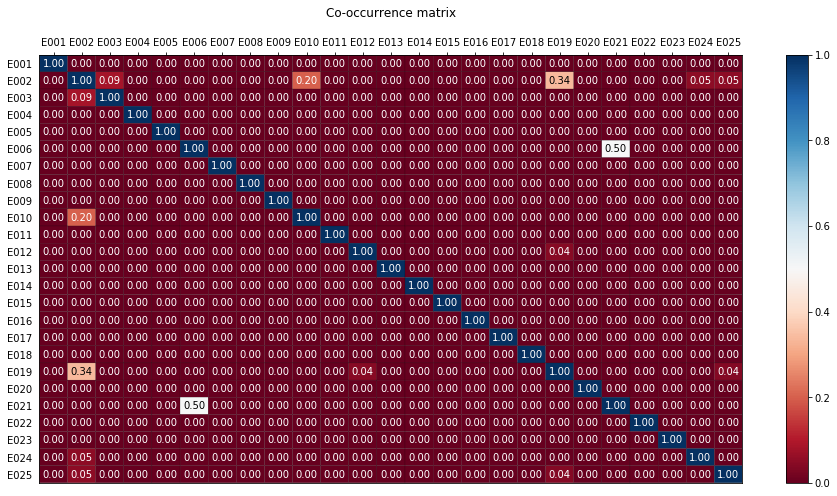

In [21]:
import numpy as np
import matplotlib.pyplot as plt


def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: http://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''
    pc.update_scalarmappable()
    ax = pc.axes
    for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)

def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    Source: http://stackoverflow.com/a/22787457/395857
    By gns-ank
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels):
    '''
    Inspired by:
    - http://stackoverflow.com/a/16124677/395857 
    - http://stackoverflow.com/a/25074150/395857
    '''

    # Plot it out
    fig, ax = plt.subplots()    
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    ax.invert_yaxis()
    ax.xaxis.tick_top()

    # resize 
    fig = plt.gcf()
    fig.set_size_inches(cm2inch(40, 20))


# Using previously computed error_codes and error_labels data
label_headers = error_labels
label_data = error_codes
print('labels:\n{0}'.format(label_data))
np.fill_diagonal(cooccurrence_matrix_percentage, 1)

# Plotting
x_axis_size = cooccurrence_matrix_percentage.shape[0]
y_axis_size = cooccurrence_matrix_percentage.shape[1]
title = "Co-occurrence matrix\n"
xlabel= ''#"Labels"
ylabel= ''#"Labels"
xticklabels = label_headers
yticklabels = label_headers
heatmap(cooccurrence_matrix_percentage, title, xlabel, ylabel, xticklabels, yticklabels)
plt.savefig('matrix_evosql.pdf', dpi=300, format='pdf', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures
plt.show()